# Ćwiczenia 3
 SpaCy -   biblioteka przetwarzania języka. 
 
 Bardziej "profesjonalna", o większych możliwościach

Wymagany jest import biblioteki i odpowiedniego (jednego z wielu) modelu, pobieramy je ze strony spacy

In [3]:
# !python -m spacy download en_core_web_sm

In [4]:
# na przykład
import spacy
nlp=spacy.load("en_core_web_sm") #maly model dla angielskiego, są modele różnych rozmiarów dla polskiego
#modele pobieramy ze strony spaCy
#polski model to pl_core_news_sm
# nlp należy do class Language (text processing pipeline) co pozwala aplikowac je na dowolny string
#model wymaga instalacji (download/load)

W bibliotece spaCy możemy znaleźć narzędzia do wielu etapów analizy językowej.

Zawiera ona tokenizer, tagger, parser, NER i wiele innych, bardzo przydatnych części.

Wszystkie w klasie Language

Spacy rozumie wiele formatów danych np . Doc, Span, Token itd.

Przykładowe narzedzia:

*   tokenizer: dzieli text na tokeny i tworzy obiekt typu Doc
*   Tagger: przypisuje do tokenów tagi części mowy
*   Lemmatizer: Redukuje słowo do jego lematu (root form)






In [5]:
doc=nlp('Hello, world. Natural Language is easy.')

# Tokenizacja
Dzieli tekst na części, zwykle pierwsza operacja

In [6]:
doc1=nlp("Tokenization splits sentence into tokens eg. words.")
print([token.text for token in doc1])

['Tokenization', 'splits', 'sentence', 'into', 'tokens', 'eg', '.', 'words', '.']


# Podział na zdania

Segmentator jest częścią DependencyParser.
Sposób działania znajdziecie Państwo poniżej.

In [7]:
text="We are learning NLP. This time we learn spaCy!"
doc2=nlp(text)
for sent in doc2.sents:
  print(sent.text)

We are learning NLP.
This time we learn spaCy!


# Zadanie 1
Znajdź tokeny i zdania z tekstu

'Hello, world. Natural Language is easy.'

Zauważ że to zdanie jest już wczytane




* Wyświetl pierwszy token

*  Wyświetl wszystkie tokeny, każdy w nowej lini

* Wyświetl zdania, każde w nowej lini



In [8]:
text = 'Hello, world. Natural Language is easy'
doc=nlp(text)

### Zadanie 1.1

In [9]:
doc[0].text

'Hello'

### Zadanie 1.2

In [10]:
for tok in doc:
    print(tok.text)

Hello
,
world
.
Natural
Language
is
easy


### Zadanie 1.3

In [11]:
for tok in doc.sents:
    print(tok)

Hello, world.
Natural Language is easy


# Tagowanie części mowy,

dla każdego tokenu przyporządkowuje część mowy

In [12]:
for token in doc1:
    print('{} - {}'.format(token, token.pos_))

Tokenization - NOUN
splits - VERB
sentence - NOUN
into - ADP
tokens - PROPN
eg - PROPN
. - PROPN
words - NOUN
. - PUNCT


Co robi powyższy kod?

# Zadanie 2
Dla każdego wyrazu w zmiennej doc wyświetl odpowiadająca mu część mowy


In [13]:
# Dla każdego tokenu wyświetl odpowiadającą mu częsć mowy
for token in doc:
    print('{} - {}'.format(token, token.pos_))

Hello - INTJ
, - PUNCT
world - NOUN
. - PUNCT
Natural - PROPN
Language - PROPN
is - AUX
easy - ADJ


# Narzędzia dla języka polskiego
W spaCy znajdują się narzędzia dedykowane językowi polskiemu

Zacznij od instalacji modelu dla języka polskiego:

*pl_core_news_sm*

Wczytaj polski model

# Tagowanie morfosyntaktyczne dla polskiego

Do tagowania można użyć różnych metod, jedną z bardzo dobrze działających jest
korzystanie z tagsetu NKJP.

 Nasz tagger to słownikowy tagger Morfeusz2 + dezambiguacja za pomocą neuronowego Toyggera (biLSTM)

Każdy token t ma trzy interesujące nas atrybuty:

t.tag_ : klasa gramatyczna według polskiego tagsetu NKJP (http://nkjp.pl/poliqarp/help/ense2.html)

t.pos_ : klasa gramatyczna według międzynarodowego tagsetu UD (mapowana z NKJP)

t._.feats : customowy atrybut odpowiadający cechom morfosyntaktycznym (np. rodzajowi gramatycznemu, lub liczbie), poszczególne wartości cech są oddzielone dwukropkiem

In [14]:
# !python -m spacy download pl_core_news_sm

In [15]:
#zadziała tylko jeżeli wczytamy  polski model !!!!

nlp=spacy.load("pl_core_news_sm")

txt = "Nornica prowadzi zmierzchowo-nocny tryb życia, ale wychodzi również za dnia w poszukiwaniu pokarmu."
doc = nlp(txt) # przetworzenie textu przez pipeline, na wyjściu dostajemy iterowalny obiekty klasy Doc, przechowujący tokeny

print("{0:15} {1:8} {2:6}\n".format(".orth_", "NKJP", "UD POS"))
for t in doc:
    print("{0:15} {1:8} {2:6}".format(t.orth_, t.tag_, t.pos_)) # wypisujemy interpretację morfosyntaktyczną każdego tokenu

.orth_          NKJP     UD POS

Nornica         SUBST    NOUN  
prowadzi        FIN      VERB  
zmierzchowo     ADJ      ADJ   
-               ADJ      PUNCT 
nocny           ADJ      ADJ   
tryb            SUBST    NOUN  
życia           GER      NOUN  
,               INTERP   PUNCT 
ale             CONJ     CCONJ 
wychodzi        FIN      VERB  
również         QUB      PART  
za              PREP     ADP   
dnia            SUBST    NOUN  
w               PREP     ADP   
poszukiwaniu    SUBST    NOUN  
pokarmu         ADJ      NOUN  
.               SUBST    PUNCT 


Czy wynik tagowania wygląda na prawidłowy? Uzasadnij odpowiedź

# Zadanie 3

Dla tekstu w języku polskim znajdującego sie w pliku 1.txt wykonaj następujące czynności:

*   Podziel tekst na tokeny
*   Wyświetl ilośc wszystkich wyrazów w tekście
*   Podziel tekst na zdania
*   Wyświetl pierwsze zdanie
*   Wyświetl ilość wszystkich zdan w tekście
*   Otaguj tekst POS (użyj tagera opartego na morfeuszu lub modelu standardowym, poszukaj w dokumentacji)




















In [ ]:
with open("1.txt", "r") as f:
    text = f.read()

### Zadanie 3.1

In [ ]:
doc1 = nlp(text)
for sent in doc1.sents:
    print(sent.text)

Natychmiast ujrzał jej zdumione oczy, potem siebie samego w postawie klęczącej i - tak jak niegdyś, podczas deszczowej nocy na balkonie - niby ślimak dotknięty w różki, skurczył się i cofnął w głąb siebie samego.

Baron schylił głowę, jak gdyby się przyglądał swoim butom myślał o czymś.
Gdzieś tam w toalecie cicho zaskrzypiały drzwi, a na dużej sali czyjeś kroki szybko zdążały w tę stronę.
Baron ocknął się z zamyślenia - jego czarne, niespokojne oczy na krótko spoczęły na twarzy Romana.

Pikole, przebrani w czyste kaftany i fartuchy, zeszli już na dół.
Ten i ów zajrzał na korytarz, uchylił drzwi do kawiarni i cofnął się, jak gdyby ujrzał tam coś niemiłego.
Adaś zdołał ukraść pannom bufetowym kilkanaście talerzyków i zanieść je na swój kredensowy stolik.
Bardzo go to cieszyło.

Z pokoju wyszła Paulina.
Poprawiając sobie włosy rozejrzała się po korytarzu i majestatycznym krokiem oddaliła się do swojego mieszkania .

W chwili gdy Palmiak zapiał po raz pierwszy, Grela flirtował z dziewczęt

### Zadanie 3.2

In [22]:
len(doc1)

2035

### Zadanie 3.3

In [26]:
sentens = [tok.text for tok in doc1.sents]
print(sentens)

['Natychmiast ujrzał jej zdumione oczy, potem siebie samego w postawie klęczącej i - tak jak niegdyś, podczas deszczowej nocy na balkonie - niby ślimak dotknięty w różki, skurczył się i cofnął w głąb siebie samego.\n', 'Baron schylił głowę, jak gdyby się przyglądał swoim butom myślał o czymś.', 'Gdzieś tam w toalecie cicho zaskrzypiały drzwi, a na dużej sali czyjeś kroki szybko zdążały w tę stronę.', 'Baron ocknął się z zamyślenia - jego czarne, niespokojne oczy na krótko spoczęły na twarzy Romana.\n', 'Pikole, przebrani w czyste kaftany i fartuchy, zeszli już na dół.', 'Ten i ów zajrzał na korytarz, uchylił drzwi do kawiarni i cofnął się, jak gdyby ujrzał tam coś niemiłego.', 'Adaś zdołał ukraść pannom bufetowym kilkanaście talerzyków i zanieść je na swój kredensowy stolik.', 'Bardzo go to cieszyło.\n', 'Z pokoju wyszła Paulina.', 'Poprawiając sobie włosy rozejrzała się po korytarzu i majestatycznym krokiem oddaliła się do swojego mieszkania .\n', 'W chwili gdy Palmiak zapiał po raz p

### Zadanie 3.4

In [27]:
sentens[0]

'Natychmiast ujrzał jej zdumione oczy, potem siebie samego w postawie klęczącej i - tak jak niegdyś, podczas deszczowej nocy na balkonie - niby ślimak dotknięty w różki, skurczył się i cofnął w głąb siebie samego.\n'

### Zadanie 3.5

In [28]:
len(sentens)

108

### Zadanie 3.6

In [31]:
print("{0:15} {1:8} {2:6}\n".format(".orth_", "NKJP", "UD POS"))
for t in doc1:
    print("{0:15} {1:8} {2:6}".format(t.orth_, t.tag_, t.pos_) )

.orth_          NKJP     UD POS

Natychmiast     ADV      ADV   
ujrzał          PRAET    VERB  
jej             PPRON3   PRON  
zdumione        ADJ      ADJ   
oczy            SUBST    NOUN  
,               INTERP   PUNCT 
potem           ADV      ADV   
siebie          SIEBIE   PRON  
samego          ADJ      ADJ   
w               PREP     ADP   
postawie        SUBST    NOUN  
klęczącej       ADJ      ADJ   
i               CONJ     CCONJ 
-               INTERP   PUNCT 
tak             ADV      ADV   
jak             ADV      SCONJ 
niegdyś         SUBST    ADV   
,               INTERP   PUNCT 
podczas         PREP     ADP   
deszczowej      ADJ      ADJ   
nocy            SUBST    NOUN  
na              PREP     ADP   
balkonie        SUBST    NOUN  
-               INTERP   PUNCT 
niby            QUB      SCONJ 
ślimak          SUBST    NOUN  
dotknięty       PPAS     ADJ   
w               PREP     ADP   
różki           SUBST    NOUN  
,               SUBST    PUNCT 
skurczy

In [ ]:
# !pip install morfeusz2

ERROR: Could not find a version that satisfies the requirement morfeusz2 (from versions: none)
ERROR: No matching distribution found for morfeusz2


# Zadanie 4

Charakterystyka stylów literackich wiąże się z proprocjami części mowy w tekście, co widac na wykresie :

 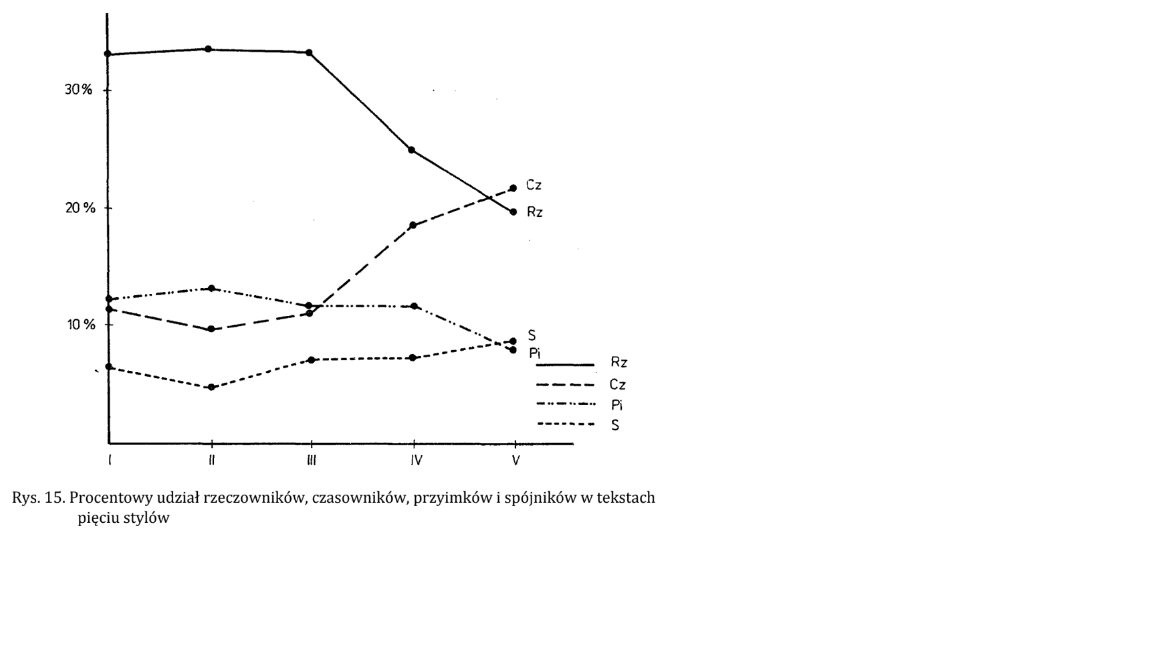

 Dla tekstu z zadania 3 oraz dla tekstu z pliku 2.txt wykonaj :

*   Policz procentową zawartość części mowy w tekście
*   Z procentowego rozkładu części mowy  i załączonego wykresuspróbuj określic z jakim typem tekstu masz od czynienia
*   Spróbuj poprawić wyniki używają stop words ( w spaCy, poszukaj metody w dokumentacji, pamiętaj że potrzebujesz narzędzi do języka polskiego)

In [43]:
# kod zadania 4
with open("1.txt", "r") as f:
    text = f.read()

doc1 = nlp(text)

with open("2.txt", "r", encoding="windows-1250") as f:
    text = f.read()

doc2 = nlp(text)

In [44]:
doc1

Natychmiast ujrzał jej zdumione oczy, potem siebie samego w postawie klęczącej i - tak jak niegdyś, podczas deszczowej nocy na balkonie - niby ślimak dotknięty w różki, skurczył się i cofnął w głąb siebie samego.
Baron schylił głowę, jak gdyby się przyglądał swoim butom myślał o czymś. Gdzieś tam w toalecie cicho zaskrzypiały drzwi, a na dużej sali czyjeś kroki szybko zdążały w tę stronę. Baron ocknął się z zamyślenia - jego czarne, niespokojne oczy na krótko spoczęły na twarzy Romana.
Pikole, przebrani w czyste kaftany i fartuchy, zeszli już na dół. Ten i ów zajrzał na korytarz, uchylił drzwi do kawiarni i cofnął się, jak gdyby ujrzał tam coś niemiłego. Adaś zdołał ukraść pannom bufetowym kilkanaście talerzyków i zanieść je na swój kredensowy stolik. Bardzo go to cieszyło.
Z pokoju wyszła Paulina. Poprawiając sobie włosy rozejrzała się po korytarzu i majestatycznym krokiem oddaliła się do swojego mieszkania .
W chwili gdy Palmiak zapiał po raz pierwszy, Grela flirtował z dziewczętami 

In [45]:
doc2

Litewska prokuratura poinformowała, że za podpaleniem sklepu IKEA w Wilnie i hali targowej w Warszawie w maju ubiegłego roku stał rosyjski wywiad. Przeciwko jednemu z podejrzanych skierowano właśnie akt oskarżenia, drugi jest w rękach polskich służb. Co wiadomo? Ustalenia litewskiej prokuratury: Śledczy zakończyli postępowanie w sprawie podpalenia sklepu IKEA w Wilnie, do którego doszło 9 maja ubiegłego roku. Prokurator generalny Litwy przekazał, że została ona zakwalifikowana jako "akt terroryzmu", a do sądu wpłynął akt oskarżenia przeciwko jednej osobie. "Dane zawarte w materiałach śledztwa przedprocesowego pozwalają przypuszczać, że czynów karalnych dokonał nieletni wówczas obywatel Ukrainy. Działał w interesie rosyjskich struktur wojskowych i służb bezpieczeństwa, w utworzonej wcześniej zorganizowanej grupie terrorystycznej, której celem było popełnianie przestępstw terrorystycznych na Litwie i na Łotwie wraz z innymi osobami" - czytamy w komunikacie. Podpalenie w Warszawie: Prokur

In [54]:
dict1 = {"NOUN": 0, "VERB": 0, "ADP": 0, "CCONJ ": 0}
for t in doc1:
    if t.pos_ in dict1:
        dict1[t.pos_] += 1

dict1

{'NOUN': 406, 'VERB': 272, 'ADP': 212, 'CCONJ ': 0}

In [55]:
dict2 = {"NOUN": 0, "VERB": 0, "ADP": 0, "CCONJ ": 0}
for t in doc2:
    if t.pos_ in dict2:
        dict2[t.pos_] += 1
        
dict2

{'NOUN': 65, 'VERB': 22, 'ADP': 33, 'CCONJ ': 0}

In [56]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

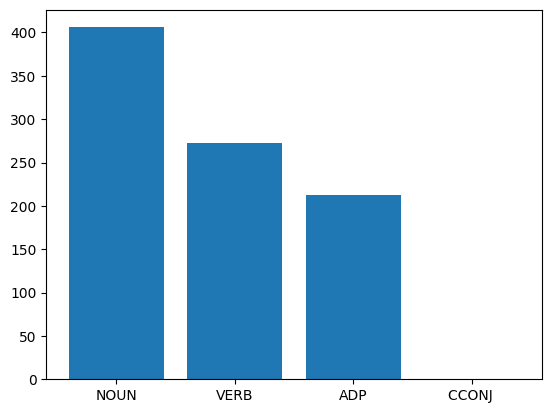

In [57]:
plt.bar(dict1.keys(), dict1.values())

<BarContainer object of 4 artists>

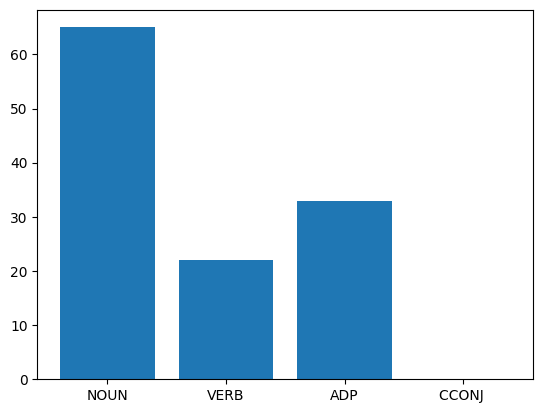

In [58]:
plt.bar(dict2.keys(), dict2.values())

# Zadanie 5
Dla wczytanych w zadaniu 4 tekstów

Oblicz proporcję czasowników (używając tagów UD),

*  Na podstawie wyników i wykresu oszacuj gatunek do którego należy tekst

In [59]:
print("Stosunek czasowników do rzeczowników: ", dict1["VERB"]/dict1["NOUN"])
print("Proporcja czasowników: ", dict1["VERB"]/sum(dict1.values()))
print("Proporcja rzeczowników: ", dict1["NOUN"]/sum(dict1.values()))

Stosunek czasowników do rzeczowników:  0.6699507389162561
Proporcja czasowników:  0.3056179775280899
Proporcja rzeczowników:  0.45617977528089887


In [60]:
print("Stosunek czasowników do rzeczowników: ", dict2["VERB"]/dict1["NOUN"])
print("Proporcja czasowników: ", dict2["VERB"]/sum(dict2.values()))
print("Proporcja rzeczowników: ", dict2["NOUN"]/sum(dict2.values()))

Stosunek czasowników do rzeczowników:  0.054187192118226604
Proporcja czasowników:  0.18333333333333332
Proporcja rzeczowników:  0.5416666666666666


Do którego gatunku nalezy tekst ? 

